# 🏪 Proyecto Aurelion

Este notebook documenta el proceso de **análisis, limpieza y transformación de datos** de la tabla `VENTAS` del proyecto *Aurelion*, utilizando la biblioteca **Pandas** en Python.

El objetivo es preparar un conjunto de datos estructurado, limpio y estandarizado para posteriores procesos de análisis estadístico, modelado o visualización.

## 📊 Descripción General

La tabla `VENTAS` contiene información detallada sobre operaciones comerciales, incluyendo campos de identificación, fechas, montos y categorías de productos.

A lo largo de este notebook se realizarón las siguientes tareas principales:

- Importación de los datos desde un archivo **Excel (.xlsx)**.  
- Creación del dataframe inicial `df_ventas_c`.  
- Procesamiento, normalización y renombrado de columnas para generar el dataframe limpio `df_ventas`.  
- Aplicación de operaciones básicas de **limpieza**, **transformación** y **estandarización** de los datos.  
- Generación de **estadísticas descriptivas** para comprender la distribución y consistencia de las variables.

## ⚙️ Limpieza y Transformación de los Datos

En esta sección se detallan las operaciones realizadas para asegurar la integridad y coherencia del dataset:

1. **Revisión de valores nulos y duplicados.**  
   - Identificación y tratamiento de valores faltantes.  
   - Eliminación o imputación según el contexto de negocio.

2. **Estandarización de tipos de datos.**  
   - Conversión de fechas, montos y categorías al formato correcto.  
   - Normalización de cadenas y eliminación de espacios o caracteres no deseados.

3. **Renombrado de columnas.**  
   - Aplicación de nombres consistentes y descriptivos conforme a las buenas prácticas de análisis de datos.

4. **Validación del dataframe final.**  
   - Verificación de dimensiones, tipos y contenido.  
   - Comparación con el dataframe original (`df_ventas_c`).

## 📝 Validación y Preparación Final del Dataset

Tras completar el proceso de limpieza y transformación, se realizarón una verificación integral del dataframe resultante df_ventas con el fin de asegurar su consistencia y calidad para análisis posteriores.

En esta etapa se incluyen las siguientes tareas:

- Comparación estructural entre el dataframe original (df_ventas_c) y el limpio (df_ventas).

- Verificación de dimensiones, tipos de datos y valores válidos.

- Confirmación de la eliminación de duplicados y valores nulos.

- Validación de nombres de columnas y formato general conforme a las convenciones de análisis.

- Consolidación del dataset final, listo para ser exportado o utilizado en etapas de modelado o visualización.

#### 🔧 Importamos librerias instaladas para implementarlas en el código

In [103]:
# Importa librerías de análisis: pandas/numpy para ETL, matplotlib/seaborn para gráficos y Path para rutas portables
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path



## 📥 Carga del Archivo de Datos

En esta sección se realiza la **importación del dataset principal** utilizando una **ruta relativa** y la librería `pathlib.Path`. Esto no solo simplifica la ruta, sino que también garantiza que el código sea **portable** y funcione correctamente en diferentes sistemas operativos (Windows, macOS, Linux), siempre y cuando la estructura de directorios se mantenga consistente.

> 📂 **Ruta del archivo:**   
> El archivo se accede mediante la construcción **`Path('db') / 'ventas.xlsx'`**.

La lectura del archivo se efectúa mediante la función `pd.read_excel()` de la biblioteca **pandas**, creando el dataframe inicial `df_ventas_c`, el cual servirá como base para los procesos posteriores de limpieza y análisis.

In [104]:
# Lee el libro de ventas con Path para mantener rutas relativas entre entornos
path_dataset = Path('db') / 'ventas.xlsx'
df_ventas_c = pd.read_excel(path_dataset)

# Genera una vista inicial para auditar columnas y tipos cargados
df_ventas_c.head()


,id_venta,fecha,id_cliente,nombre_cliente,email,medio_pago
0,1,2024-06-19,62,Guadalupe Romero,guadalupe.romero@mail.com,tarjeta
1,2,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr
2,3,2024-01-13,20,Tomas Acosta,tomas.acosta@mail.com,tarjeta
3,4,2024-02-27,36,Martina Molina,martina.molina@mail.com,transferencia
4,5,2024-06-11,56,Bruno Diaz,bruno.diaz@mail.com,tarjeta


## 🔍 Inspección Inicial del Dataset

En esta etapa se realiza una **inspección exploratoria básica** del DataFrame `df_ventas_c` recién cargado, con el objetivo de verificar que los datos se hayan importado correctamente y posean la estructura esperada.

Para ello, se utilizan las funciones:

In [105]:
# Revisa las primeras 8 filas para detectar inconsistencias tempranas
df_ventas_c.head(8)


,id_venta,fecha,id_cliente,nombre_cliente,email,medio_pago
0,1,2024-06-19,62,Guadalupe Romero,guadalupe.romero@mail.com,tarjeta
1,2,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr
2,3,2024-01-13,20,Tomas Acosta,tomas.acosta@mail.com,tarjeta
3,4,2024-02-27,36,Martina Molina,martina.molina@mail.com,transferencia
4,5,2024-06-11,56,Bruno Diaz,bruno.diaz@mail.com,tarjeta
5,6,2024-05-05,91,Uma Sanchez,uma.sanchez@mail.com,transferencia
6,7,2024-05-06,92,Mariana Rodriguez,mariana.rodriguez@mail.com,efectivo
7,8,2024-01-06,66,Tomas Herrera,tomas.herrera@mail.com,transferencia


In [106]:
# Contrasta las últimas 4 filas para identificar valores atípicos al final del dataset
df_ventas_c.tail(4)


,id_venta,fecha,id_cliente,nombre_cliente,email,medio_pago
116,117,2024-03-14,72,Camila Rodriguez,camila.rodriguez@mail.com,tarjeta
117,118,2024-02-09,84,Pablo Sanchez,pablo.sanchez@mail.com,efectivo
118,119,2024-02-07,51,Agustina Gomez,agustina.gomez@mail.com,qr
119,120,2024-04-21,72,Camila Rodriguez,camila.rodriguez@mail.com,tarjeta


## 🧠 Exploración de Tipos de Datos y Valores Nulos

En esta etapa se realiza una **revisión estructural del DataFrame** para confirmar que los tipos de datos asignados a cada variable durante la lectura con `pd.read_excel()` sean correctos y coherentes con la naturaleza de la información (por ejemplo, fechas, números, textos, etc.).

Además, se evalúa la **presencia de valores nulos o faltantes**, los cuales podrían requerir tratamiento posterior durante el proceso de limpieza y estandarización.

### 🧩 Procedimiento

In [107]:
# Inspecciona estructura, tipos dtypes y memoria del dataframe importado
df_ventas_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id_venta        120 non-null    int64         
 1   fecha           120 non-null    datetime64[ns]
 2   id_cliente      120 non-null    int64         
 3   nombre_cliente  120 non-null    object        
 4   email           120 non-null    object        
 5   medio_pago      120 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 5.8+ KB


> 💡 **Conclusión:**  
> A partir de la ejecución del comando `df_ventas_c.info()`, se observa que la base de datos cuenta con **120 registros** distribuidos en **6 columnas**.  
> Cada columna presenta **120 valores no nulos**, lo que indica que **no existen datos faltantes (NaN)** en el dataset.  
> Además, los tipos de datos se encuentran correctamente definidos: campos numéricos (`int64`), de texto (`object`) y de fecha (`datetime64[ns]`), lo que refleja una estructura **coherente y lista para iniciar el proceso de limpieza y transformación**.

### 🕵️‍♂️ Detección de Valores Nulos

Se analiza la presencia de valores faltantes para priorizar acciones de limpieza y asegurar la consistencia del dataset.

In [108]:
# Visualiza la máscara booleana donde True marca valores faltantes por celda
df_ventas_c.isnull()

,id_venta,fecha,id_cliente,nombre_cliente,email,medio_pago
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
115,False,False,False,False,False,False
116,False,False,False,False,False,False
117,False,False,False,False,False,False
118,False,False,False,False,False,False


In [109]:
# Resume la cantidad de nulos por columna para priorizar limpieza
df_ventas_c.isnull().sum()


id_venta          0
fecha             0
id_cliente        0
nombre_cliente    0
email             0
medio_pago        0
dtype: int64

In [110]:
df_ventas_c.describe(include='all')  # Estadísticas descriptivas para todas las columnas

,id_venta,fecha,id_cliente,nombre_cliente,email,medio_pago
count,120.000000,120,120.000000,120,120,120
unique,NaN,NaN,NaN,64,67,4
top,NaN,NaN,NaN,Bruno Diaz,bruno.diaz@mail.com,efectivo
freq,NaN,NaN,NaN,5,5,37
mean,60.500000,2024-03-29 17:36:00,47.291667,NaN,NaN,NaN
min,1.000000,2024-01-02 00:00:00,1.000000,NaN,NaN,NaN
25%,30.750000,2024-02-11 06:00:00,24.500000,NaN,NaN,NaN
50%,60.500000,2024-03-25 00:00:00,48.500000,NaN,NaN,NaN
75%,90.250000,2024-05-19 06:00:00,67.500000,NaN,NaN,NaN
max,120.000000,2024-06-28 00:00:00,100.000000,NaN,NaN,NaN


> 💬 Conclusión: El número de **`valores únicos (o clases)`** en la variable categórica **`medio_pago`** es **`Unique = 4`**. Dado que se identificaron cuatro clases distintas dentro de la categoría `medio_pago`, esta característica es apta para ser `codificada` mediante la **técnica de `One-Hot-Encoding`**. Este método de codificación resultará en la creación de **cuatro nuevas variables binarias (0 o 1)** para su uso en el modelado.

## ⚙️ Normalización y Corrección de Tipos de Datos

Antes de realizar la normalización de la base de datos, es necesario **verificar y corregir los tipos de datos** asignados a las variables y estandarizar los campos de texto. En este caso, la columna `fecha` se convierte al formato `datetime` para permitir análisis temporal. Adicionalmente, se **normalizan** los campos de texto (`nombre_cliente` y `email`) y se optimiza `medio_pago` a tipo `categórico` para mejorar la eficiencia del DataFrame.

### 🧩 Fundamento

Corregir los tipos de datos garantiza la **precisión numérica** en cálculos y estadísticas.  
Si se mantuvieran como enteros, se perdería información decimal y se podrían producir errores al calcular promedios, totales o al aplicar operaciones aritméticas.

Este paso forma parte del proceso de **limpieza estructural** dentro de la metodología ETL (Extract, Transform, Load):

1. **Extracción:** se importan los datos desde el archivo Excel.  
2. **Transformación estructural:** se ajustan los tipos de datos para asegurar coherencia.  
3. **Normalización:** se reorganiza la base, eliminando redundancias o columnas innecesarias.

### 🧮 Procedimiento

- Se aplican las transformaciones para:

     **Fecha:** Asegurar formato `datetime` (día-mes-año), tratando los errores como `NaT`.

     **Texto:** Limpiar `nombre_cliente` (eliminar espacios, formato título) y `email` (eliminar espacios, minúsculas).

     **Categórica:** Convertir `medio_pago` a tipo `category`.

In [111]:
# Convierte fecha al formato datetime (día-mes-año) y marca entradas inválidas como NaT
df_ventas_c['fecha'] = pd.to_datetime(df_ventas_c['fecha'], dayfirst=True, errors='coerce')

# Normaliza campos de texto: elimina espacios, ajusta capitalización y homogeniza correos
df_ventas_c['nombre_cliente'] = df_ventas_c['nombre_cliente'].str.strip().str.title()
df_ventas_c['email'] = df_ventas_c['email'].str.lower().str.strip()

# Define medio_pago como categoría para optimizar memoria y habilitar análisis estadístico
df_ventas_c['medio_pago'] = df_ventas_c['medio_pago'].astype('category')


#### 🕵️‍♂️ Verificación de Transformaciones

Se valida que los cambios aplicados hayan surtido efecto tanto en los tipos de datos como en los valores muestreados.

In [112]:
# Verifica los tipos de datos de las columnas normalizadas tras la conversión
df_ventas_c[["fecha", "nombre_cliente", "email", "medio_pago"]].dtypes

fecha             datetime64[ns]
nombre_cliente            object
email                     object
medio_pago              category
dtype: object

In [113]:
# Realiza muestreo de las columnas transformadas para comprobar resultados
df_ventas_c[["fecha", "nombre_cliente", "email", "medio_pago"]].head()

,fecha,nombre_cliente,email,medio_pago
0,2024-06-19,Guadalupe Romero,guadalupe.romero@mail.com,tarjeta
1,2024-03-17,Olivia Gomez,olivia.gomez@mail.com,qr
2,2024-01-13,Tomas Acosta,tomas.acosta@mail.com,tarjeta
3,2024-02-27,Martina Molina,martina.molina@mail.com,transferencia
4,2024-06-11,Bruno Diaz,bruno.diaz@mail.com,tarjeta


#### 🕵️‍♂️ Control de Calidad: Duplicados

Se evalúa la unicidad de registros, especialmente en la columna `id_venta`, que actúa como identificador clave.

In [114]:
# Evalúa duplicados globales y por id_venta para validar la unicidad clave de ventas
cantidad_duplicados = df_ventas_c.duplicated().sum()
duplicados_id_venta = df_ventas_c['id_venta'].duplicated().sum()

print()
print('--- Registros Duplicados ---')
if cantidad_duplicados > 0:
    print(f'Se encontraron {cantidad_duplicados} filas duplicadas.')
else:
    print('No se encontraron filas duplicadas.')

if duplicados_id_venta > 0:
    print(f'Alerta: se detectaron {duplicados_id_venta} valores repetidos en id_venta (posible clave primaria).')
else:
    print('id_venta es único en df_ventas_c.')

# Referencia de acción: usar df_ventas_c.drop_duplicates() si se requiere depurar duplicados
# df_ventas_c = df_ventas_c.drop_duplicates().copy()



--- Registros Duplicados ---
No se encontraron filas duplicadas.
id_venta es único en df_ventas_c.


> 💡 **Conclusión:**                                                                 
> Luego de la verificación y **normalización optimizada** de tipos de datos, se confirma que todas las variables del *dataset* `VENTAS` presentan formatos consistentes y adecuados:
> * La columna **`fecha`** se encuentra correctamente definida como **`datetime64[ns]`**, interpretada bajo el formato **día-mes-año (dd-mm-yyyy)** conforme al estándar de la República Argentina.
> * Las columnas **`nombre_cliente`** y **`email`** se mantienen como texto (`object` o `string`), asegurando su **normalización** (mayúsculas, minúsculas y eliminación de espacios) con un código más limpio y eficiente al **eliminar pasos de conversión redundantes**.
> * La variable **`medio_pago`** fue convertida al tipo **categórico (`category`)**, lo que facilita su uso en análisis descriptivos y segmentaciones, optimizando el uso de memoria.
> De esta forma, el *dataframe* `df_ventas_c` queda estructurado de manera coherente, **garantizando integridad, consistencia, y una ligera mejora en la eficiencia del procesamiento** para las etapas posteriores de transformación y análisis.

#### 🧩 Normalización de la Base de Datos

En esta etapa se aplica la **forma de normalización** sobre el DataFrame `df_ventas_c`, eliminando las columnas **`nombre_cliente`** y **`email`**. 
Estas **columnas presentan información descriptiva redundante** respecto a **`id_cliente`** (la clave foránea del cliente en esta tabla transaccional), por lo que se suprimen para evitar duplicidad de datos y mantener la integridad estructural de la base de datos (Primera Forma Normal).

In [115]:
# Crea df_ventas_True excluyendo columnas personales redundantes frente a id_cliente
df_ventas_True = df_ventas_c.drop(columns=['nombre_cliente', 'email'])


In [116]:
# Inspecciona las primeras filas del dataset anonimizado para asegurar integridad
df_ventas_True.head()


,id_venta,fecha,id_cliente,medio_pago
0,1,2024-06-19,62,tarjeta
1,2,2024-03-17,49,qr
2,3,2024-01-13,20,tarjeta
3,4,2024-02-27,36,transferencia
4,5,2024-06-11,56,tarjeta


#### Revisión de Integridad de **df_ventas_True**

In [117]:
## Auditoría de integridad: nulos y duplicados en df_ventas_True

# Paso 1: contabiliza nulos por columna para definir tratamientos
print('--- Valores Nulos en df_ventas_True ---')
print(df_ventas_True.isnull().sum())
print('-' * 37)

# Paso 2: identifica y elimina duplicados manteniendo consistencia de id_venta
cantidad_duplicados = df_ventas_True.duplicated().sum()
duplicados_id_venta = df_ventas_True['id_venta'].duplicated().sum()

print()
print('--- Registros Duplicados ---')
if cantidad_duplicados > 0:
    print(f'Se encontraron {cantidad_duplicados} filas duplicadas. Eliminando...')
    df_ventas_True = df_ventas_True.drop_duplicates().copy()
    print('Duplicados eliminados.')
else:
    print('No se encontraron filas duplicadas.')

if duplicados_id_venta > 0:
    print(f'Alerta: se identificaron {duplicados_id_venta} valores repetidos en id_venta dentro de df_ventas_True.')
else:
    print('id_venta es único en df_ventas_True.')


--- Valores Nulos en df_ventas_True ---
id_venta      0
fecha         0
id_cliente    0
medio_pago    0
dtype: int64
-------------------------------------

--- Registros Duplicados ---
No se encontraron filas duplicadas.
id_venta es único en df_ventas_True.


#### 💻 Aplicación de One Hot Encoding (medio_pago)

El **`One Hot Encoding`** convierte cada valor categórico único en la columna `medio_pago` en un número entero.

In [118]:
from sklearn.preprocessing import OneHotEncoder

# Crear la instancia del encoder
ohe = OneHotEncoder(sparse_output=False)

# Aplicar el encoding solo a la columna 'medio_pago'
ohe_array = ohe.fit_transform(df_ventas_True[['medio_pago']])
#fit aprende las categorías y transform las convierte en vectores de 0 y 1

# Crear un DataFrame con las nuevas columnas codificadas
ohe_df = pd.DataFrame(ohe_array, columns=ohe.get_feature_names_out(['medio_pago']))
#agregar el prefijo medio_pago_ a las nuevas columnas y convierte en DataFrame (ohe_df)

# Concatenar el nuevo DataFrame con el original
df_ventas_True = pd.concat([df_ventas_True, ohe_df], axis=1)

In [119]:
ohe_df.head(5)

,medio_pago_efectivo,medio_pago_qr,medio_pago_tarjeta,medio_pago_transferencia
0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0


In [120]:
df_ventas_True.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id_venta                  120 non-null    int64         
 1   fecha                     120 non-null    datetime64[ns]
 2   id_cliente                120 non-null    int64         
 3   medio_pago                120 non-null    category      
 4   medio_pago_efectivo       120 non-null    float64       
 5   medio_pago_qr             120 non-null    float64       
 6   medio_pago_tarjeta        120 non-null    float64       
 7   medio_pago_transferencia  120 non-null    float64       
dtypes: category(1), datetime64[ns](1), float64(4), int64(2)
memory usage: 7.0 KB


> 🔎 La columna **categórica original**, `medio_pago`, debe ser **eliminada** del DataFrame.
> Una vez aplicada la técnica de `One-Hot Encoding`, la columna original se vuelve **redundante** e **inutilizable** para la fase de `modelado`. Su eliminación es un **paso esencial para completar el preprocesamiento**, ya que **asegura que el conjunto de datos solo contenga variables de tipo numérico**, dejándolo apto y optimizado para ser analizado por cualquier algoritmo de Machine Learning.

In [121]:
# Eliminamos las columna 'medio_pago'
df_ventas_True.drop('medio_pago', axis=1, inplace=True)

In [122]:
# Revisión que la columna 'medio_pago' se haya borrado con éxito
df_ventas_True.head(0)

,id_venta,fecha,id_cliente,medio_pago_efectivo,medio_pago_qr,medio_pago_tarjeta,medio_pago_transferencia


In [123]:
# --- FEATURE ENGINEERING DE FECHA Y RECURRENCIA ---

# 1. Extracción de Componentes Temporales de 'fecha'
df_ventas_True['anio'] = df_ventas_True['fecha'].dt.year
df_ventas_True['mes'] = df_ventas_True['fecha'].dt.month
# Genera los días en inglés
df_ventas_True['dia_semana'] = df_ventas_True['fecha'].dt.day_name() 
df_ventas_True['trimestre'] = df_ventas_True['fecha'].dt.quarter

# 2. Traducción de los Días a Español
traduccion_dias = {
    'Monday': 'Lunes', 
    'Tuesday': 'Martes', 
    'Wednesday': 'Miércoles', 
    'Thursday': 'Jueves', 
    'Friday': 'Viernes', 
    'Saturday': 'Sábado', 
    'Sunday': 'Domingo'
}

# Aplicar el mapeo para actualizar la columna 'dia_semana' directamente
df_ventas_True['dia_semana'] = df_ventas_True['dia_semana'].map(traduccion_dias)


# 3. Creación de una Métrica de Recurrencia
conteo_cliente = df_ventas_True.groupby('id_cliente')['id_venta'].count().reset_index()
conteo_cliente.columns = ['id_cliente', 'transacciones_cliente']
df_ventas_True = df_ventas_True.merge(conteo_cliente, on='id_cliente', how='left')

print("✅ Feature Engineering aplicado: Componentes de Fecha (en español) y recurrencia añadidos.")
print(df_ventas_True[['fecha', 'mes', 'dia_semana', 'transacciones_cliente']].head())

✅ Feature Engineering aplicado: Componentes de Fecha (en español) y recurrencia añadidos.
       fecha  mes dia_semana  transacciones_cliente
0 2024-06-19    6  Miércoles                      2
1 2024-03-17    3    Domingo                      4
2 2024-01-13    1     Sábado                      2
3 2024-02-27    2     Martes                      1
4 2024-06-11    6     Martes                      5


In [124]:
# --- ANÁLISIS Y RESUMEN ESTADÍSTICO REPRESENTATIVO ---

# 1. Análisis de Medidas Centrales y Dispersión
print("📊 RESUMEN ESTADÍSTICO DE VARIABLES CLAVE (TRANSACCIONES Y RECURRENCIA)")
print("----------------------------------------------------------------------")
# Transacciones_cliente nos da una idea de la distribución de lealtad
print(df_ventas_True[['mes', 'trimestre', 'transacciones_cliente']].describe().T)

# 2. Resumen de Distribución de Medios de Pago (Análisis del OHE)
# La media de las columnas binarias es la proporción (probabilidad) de esa categoría.
columnas_ohe = [col for col in df_ventas_True.columns if col.startswith('medio_pago_')]
frecuencias_pago = df_ventas_True[columnas_ohe].mean().sort_values(ascending=False) * 100

print("\n\n📊 DISTRIBUCIÓN PORCENTUAL DE MEDIOS DE PAGO (ANÁLISIS OHE)")
print("------------------------------------------------------------")
# Formato limpio para presentar el resumen clave
print(frecuencias_pago.apply(lambda x: f"{x:.2f}%").to_string(header=False).replace('medio_pago_', ''))

# 3. Análisis de Frecuencia de Recurrencia (Insight clave para el negocio)
recurrencia_conteo = df_ventas_True.groupby('id_cliente')['transacciones_cliente'].first().value_counts().sort_index()
total_clientes = recurrencia_conteo.sum()
clientes_unicos = recurrencia_conteo.get(1, 0) # Clientes que compraron solo una vez
clientes_recurrentes = total_clientes - clientes_unicos

print("\n\n📊 RESUMEN DE RECURRENCIA DE CLIENTES")
print("-------------------------------------")
print(f"Total de Clientes Únicos en el período: {total_clientes}")
print(f"Clientes de 1 Transacción: {clientes_unicos} ({clientes_unicos/total_clientes:.1%})")
print(f"Clientes Recurrentes (>1 Transacción): {clientes_recurrentes} ({clientes_recurrentes/total_clientes:.1%})")

📊 RESUMEN ESTADÍSTICO DE VARIABLES CLAVE (TRANSACCIONES Y RECURRENCIA)
----------------------------------------------------------------------
                       count      mean       std  min   25%  50%  75%  max
mes                    120.0  3.425000  1.794775  1.0  2.00  3.0  5.0  6.0
trimestre              120.0  1.458333  0.500350  1.0  1.00  1.0  2.0  2.0
transacciones_cliente  120.0  2.283333  1.138946  1.0  1.75  2.0  3.0  5.0


📊 DISTRIBUCIÓN PORCENTUAL DE MEDIOS DE PAGO (ANÁLISIS OHE)
------------------------------------------------------------
efectivo         30.83%
qr               25.00%
transferencia    22.50%
tarjeta          21.67%


📊 RESUMEN DE RECURRENCIA DE CLIENTES
-------------------------------------
Total de Clientes Únicos en el período: 67
Clientes de 1 Transacción: 30 (44.8%)
Clientes Recurrentes (>1 Transacción): 37 (55.2%)


### 📈 Visualización de Datos (Gráficos)

In [125]:
# --- VISUALIZACIÓN DE DATOS (GRÁFICOS) ---
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuración de visualización
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100 
columnas_ohe = [col for col in df_ventas_True.columns if col.startswith('medio_pago_')]
orden_dias_es = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

#### 📊 GRÁFICO: Distribución de `Medios de Pago` 
- Argumentación Estadística: **Gráfico de Barras**.
- Se utiliza para variables categóricas nominales (Medio de Pago) que fueron codificadas mediante 
`One-Hot Encoding (OHE)`. La altura de la barra representa la **frecuencia** o **proporción** de cada **categoría**, siendo ideal para visualizar la **`moda`** o la **preferencia dominante** del cliente.

C:\Users\Asus\AppData\Local\Temp\ipykernel_10452\1604758231.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nombres_limpios, y=frecuencias_pago_df.values, palette="rocket")


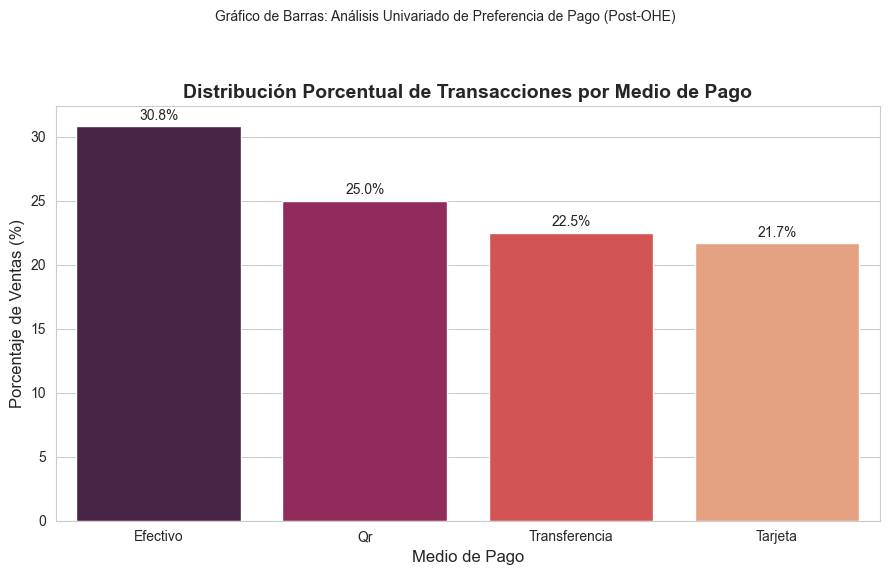

In [135]:
frecuencias_pago_df = (df_ventas_True[columnas_ohe].mean() * 100).sort_values(ascending=False)
nombres_limpios = [col.replace('medio_pago_x0_', '').replace('medio_pago_', '').replace('_', ' ').title() for col in frecuencias_pago_df.index]

plt.figure(figsize=(9, 6))
sns.barplot(x=nombres_limpios, y=frecuencias_pago_df.values, palette="rocket")
plt.title('Distribución Porcentual de Transacciones por Medio de Pago', fontsize=14, weight='bold')
plt.suptitle('Gráfico de Barras: Análisis Univariado de Preferencia de Pago (Post-OHE)', fontsize=10, y=0.95)
plt.ylabel('Porcentaje de Ventas (%)', fontsize=12)
plt.xlabel('Medio de Pago', fontsize=12)
plt.xticks(rotation=0)
for i, valor in enumerate(frecuencias_pago_df.values):
    plt.text(i, valor + 0.5, f'{valor:.1f}%', ha='center', fontsize=10)
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()

#### 📈 GRÁFICO: Tendencia de Transacciones por Mes´
- Argumentación Estadística: **Gráfico de Líneas**.
- Es el estándar para la visualización de **`Series Temporales` (Ventas a lo largo del tiempo)**. 
La `línea` permite identificar la **tendencia general**, la **estacionalidad (patrones repetitivos)** y los **picos/valles anómalos** (como el de Mayo) que rompen la tendencia.

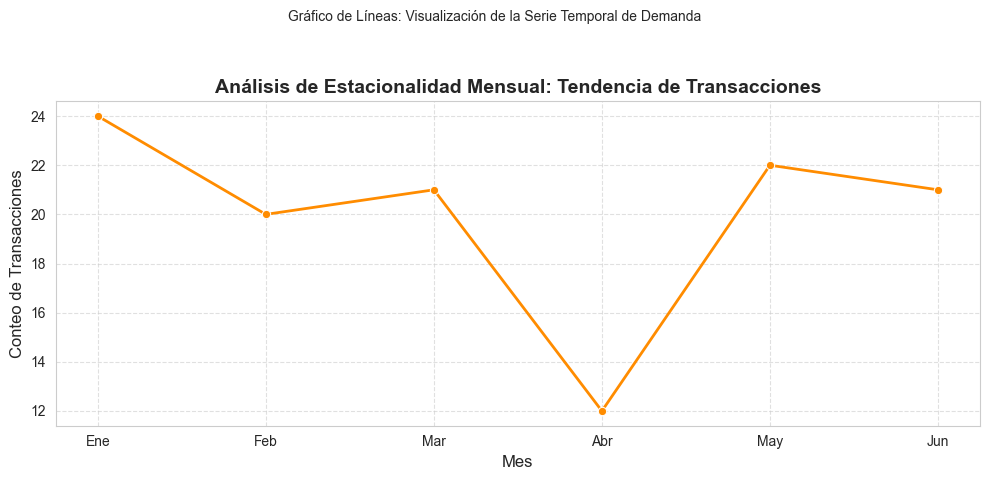

In [134]:
transacciones_mes = df_ventas_True.groupby('mes')['id_venta'].count()
nombres_meses = {1: 'Ene', 2: 'Feb', 3: 'Mar', 4: 'Abr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Ago', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dic'} 
etiquetas_mes = [nombres_meses.get(m, m) for m in transacciones_mes.index]

plt.figure(figsize=(10, 5))
sns.lineplot(x=transacciones_mes.index, y=transacciones_mes.values, marker='o', color='darkorange', linewidth=2)
plt.title('Análisis de Estacionalidad Mensual: Tendencia de Transacciones', fontsize=14, weight='bold')
plt.suptitle('Gráfico de Líneas: Visualización de la Serie Temporal de Demanda', fontsize=10, y=0.95)
plt.ylabel('Conteo de Transacciones', fontsize=12)
plt.xlabel('Mes', fontsize=12)
plt.xticks(transacciones_mes.index, etiquetas_mes)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()

#### 📉 GRÁFICO: Demanda por Día de la Semana
- Argumentación Estadística: Gráfico de **Barras Ordenado**.
- Utilizado para variables **categóricas ordinales** (Día de la Semana) donde el orden del eje X 
es relevante. Visualiza la distribución de la demanda y es esencial para la planificación 
operativa y de recursos (staffing).

C:\Users\Asus\AppData\Local\Temp\ipykernel_10452\2227457094.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=transacciones_dia.index, y=transacciones_dia.values, palette="tab10")


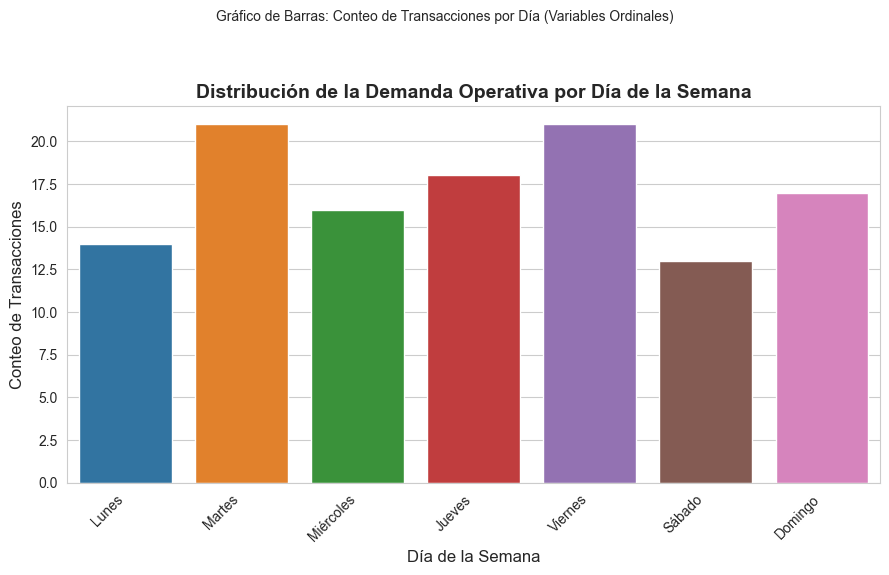

In [133]:
transacciones_dia = df_ventas_True.groupby('dia_semana')['id_venta'].count().reindex(orden_dias_es)

plt.figure(figsize=(9, 6))
sns.barplot(x=transacciones_dia.index, y=transacciones_dia.values, palette="tab10")
plt.title('Distribución de la Demanda Operativa por Día de la Semana', fontsize=14, weight='bold')
plt.suptitle('Gráfico de Barras: Conteo de Transacciones por Día (Variables Ordinales)', fontsize=10, y=0.95)
plt.ylabel('Conteo de Transacciones', fontsize=12)
plt.xlabel('Día de la Semana', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()


#### 📈 GRÁFICO: **Histograma de Recurrencia (Fidelidad de Clientes)**
- Argumentación Estadística: **Histograma** (Distribución de Frecuencias).
- Muestra la forma (`skewness`) de la **distribución** de una variable **numérica discreta** (transacciones por cliente). Permite **identificar si la mayoría de los clientes son de una sola transacción **(sesgo a la izquierda) o si **el negocio tiene una base fuerte de clientes recurrentes**.

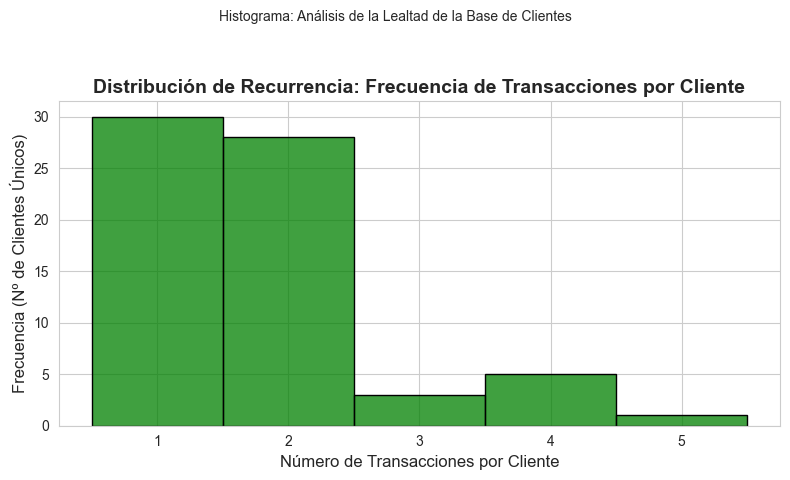

In [132]:
clientes_recurrentes = df_ventas_True.groupby('id_cliente')['transacciones_cliente'].first()

plt.figure(figsize=(8, 5))
sns.histplot(clientes_recurrentes, bins=np.arange(clientes_recurrentes.max() + 2) - 0.5, kde=False, color='green', edgecolor='black', discrete=True)
plt.title('Distribución de Recurrencia: Frecuencia de Transacciones por Cliente', fontsize=14, weight='bold')
plt.suptitle('Histograma: Análisis de la Lealtad de la Base de Clientes', fontsize=10, y=0.95)
plt.xlabel('Número de Transacciones por Cliente', fontsize=12)
plt.ylabel('Frecuencia (Nº de Clientes Únicos)', fontsize=12)
plt.xticks(np.arange(1, clientes_recurrentes.max() + 1))
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()


#### 📉 GRÁFICO: Análisis Bivariado (Recurrencia vs. Días de la Semana)
- Argumentación Estadística: Gráfico de **Barras Bivariado** (Media Condicional).
- Compara la **media** de una **variable numérica** (Recurrencia) en función de una **variable categórica/ordinal** (Día de la Semana). Este enfoque bivariado es superior a la regresión lineal cuando la variable X es categórica, ya que **muestra las diferencias del promedio** (interrelación) de manera clara y segmentada.

C:\Users\Asus\AppData\Local\Temp\ipykernel_10452\2608551182.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=recurrencia_por_dia.index, y=recurrencia_por_dia.values, palette="vlag")


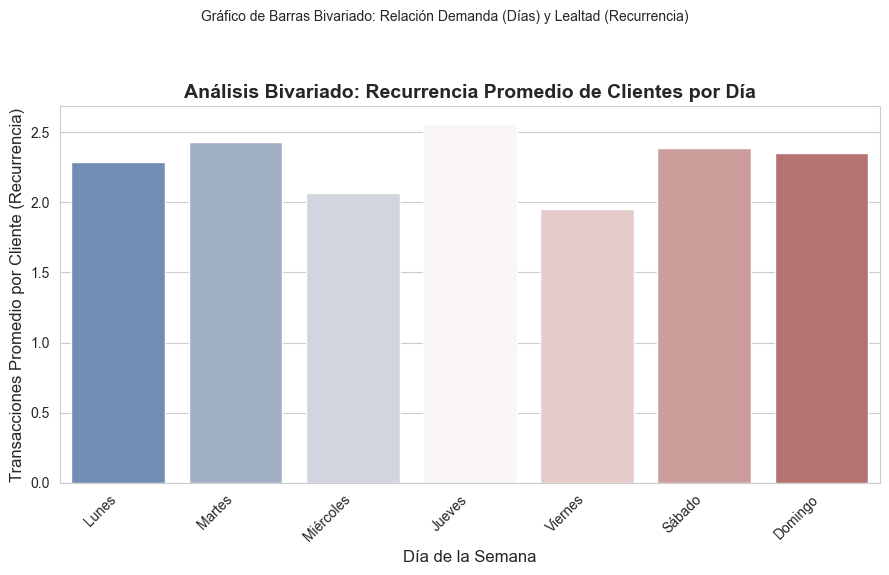

In [131]:
recurrencia_por_dia = df_ventas_True.groupby('dia_semana')['transacciones_cliente'].mean().reindex(orden_dias_es)

plt.figure(figsize=(9, 6))
sns.barplot(x=recurrencia_por_dia.index, y=recurrencia_por_dia.values, palette="vlag")
plt.title('Análisis Bivariado: Recurrencia Promedio de Clientes por Día', fontsize=14, weight='bold')
plt.suptitle('Gráfico de Barras Bivariado: Relación Demanda (Días) y Lealtad (Recurrencia)', fontsize=10, y=0.95)
plt.ylabel('Transacciones Promedio por Cliente (Recurrencia)', fontsize=12)
plt.xlabel('Día de la Semana', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()